Generate a plot of winning bid arrival times for the earliest bid detection by any relay.

Author: Tripoli - Data Always \
Date Modified: December 11, 2023 \
License: CC0

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [16]:
base_path = '../data/'
file_paths = os.listdir(base_path)

dfs = []
for file in file_paths:
    if len(file) < 10: #.DS_store
        continue
    
    df_tmp = pd.read_parquet(os.path.join(base_path, file))
    dfs.append(df_tmp)

df = pd.concat(dfs)
df = df[df['payload_delivered'] == True]
df.sort_values(by=['block_number', 'bid_timestamp_ms'], ascending=True, inplace=True)
df.reset_index(inplace=True, drop=True)

In [3]:
df.dropna(subset='relay', inplace=True)
# drop non-boost blocks

df.drop_duplicates(subset='block_hash', keep='first', inplace=True)
# drop relays that got the data late, only keep the earliest.

df.reset_index(inplace=True, drop=True)

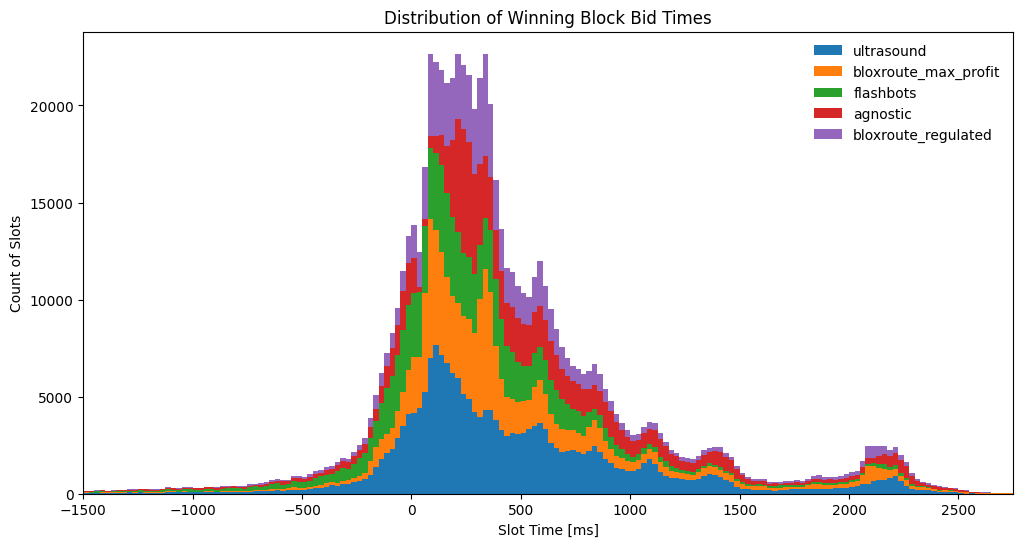

In [17]:
relays = list(df['relay'].value_counts().head(5).index)

fig = plt.figure(figsize = (12, 6))
plt.title('Distribution of Winning Block Bid Times')

bin_size = 25
bins = np.arange(-12000, 12000, bin_size)

df_counts = pd.DataFrame()
for xx in range(len(relays)):
    df_counts = pd.concat([df_counts, df[df['relay'] == relays[xx]]])
    plt.hist([x-12000 for x in df_counts['slot_time_ms']], bins=bins, label = relays[xx], zorder = 1 - xx/100)

plt.xlim([-1500, 2750])
plt.xlabel('Slot Time [ms]')
plt.ylabel('Count of Slots')
plt.ylim([0, None])

plt.legend(loc = 'upper right', frameon=False)
plt.show()